In [1]:
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt

In [3]:
CUBE_WIDTH = 2
SPHERE_RADIUS = 1

In [4]:
def get_random_points_in_cube(points_count, dims):
    return np.random.default_rng().uniform(-1, 1, (points_count, dims))

In [5]:
def test1(points_count, dims):
    points = get_random_points_in_cube(points_count, dims)
    distances = np.linalg.norm(points, axis=1)
    points_inside_cube_count = np.count_nonzero(distances <= SPHERE_RADIUS)
    return points_inside_cube_count / points_count

In [15]:
def test2(points_count, dims, prop = 'mean'):
    points = get_random_points_in_cube(points_count, dims)
    pairs = combinations(points, 2)
    distances = list(map(lambda pair: np.linalg.norm(pair[0] - pair[1]), pairs))
    mean_distance = np.mean(distances)
    std_dev_distance = np.std(distances)
    values = {
        'mean': mean_distance,
        'std': std_dev_distance,
        'std_to_mean': std_dev_distance / mean_distance
    }
    return values.get(prop)

In [39]:
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def test3(points_count, dims, angle_count = 1):
    points = get_random_points_in_cube(points_count, dims)
    angles = []
    for _ in range(angle_count):
        v1, v2 = points[np.random.choice(points.shape[0], 2, replace=False)]
        angle = np.arccos(np.clip(np.dot(unit_vector(v1), unit_vector(v2)), -1.0, 1.0))
        angles.append(angle)
    mean_angle = np.mean(angles)
    return mean_angle

In [81]:
def test(title, points_count, dims_range, repeats_per_dim, test_fn, *args):
    plt.figure(figsize=(10, 6), dpi=100)
    mean = []
    std = []
    for dims in dims_range:
        values_for_dims = []
        for _ in range(repeats_per_dim):
            values_for_dims.append(test_fn(points_count, dims, *args))
        mean.append(np.mean(values_for_dims))
        std.append(np.std(values_for_dims))

    plt.bar(dims_range, mean, yerr=std, align='center', alpha=0.75, color='green', ecolor='red', capsize=4)
    plt.xticks(list(filter(lambda i : i % 5 == 0, dims_range)))
    plt.xlabel("Dimensions number")
    plt.ylabel(title)

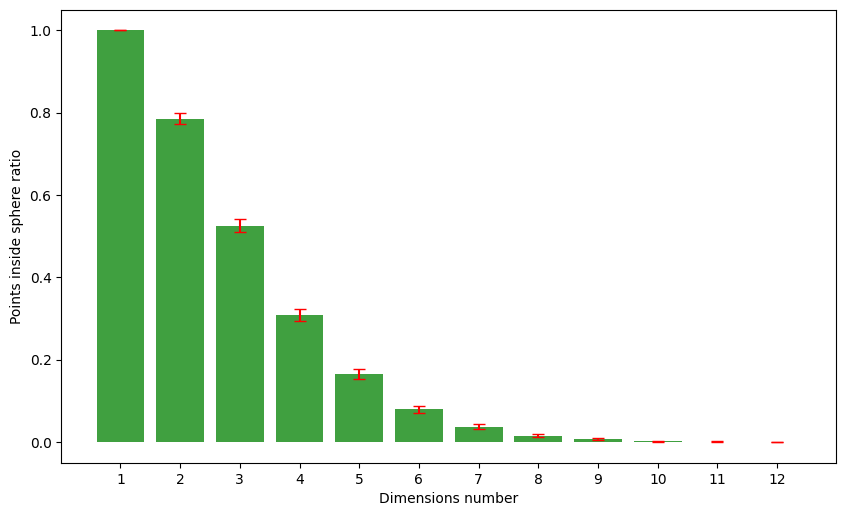

In [69]:
test(1000, np.arange(1, 13), 100, test1)

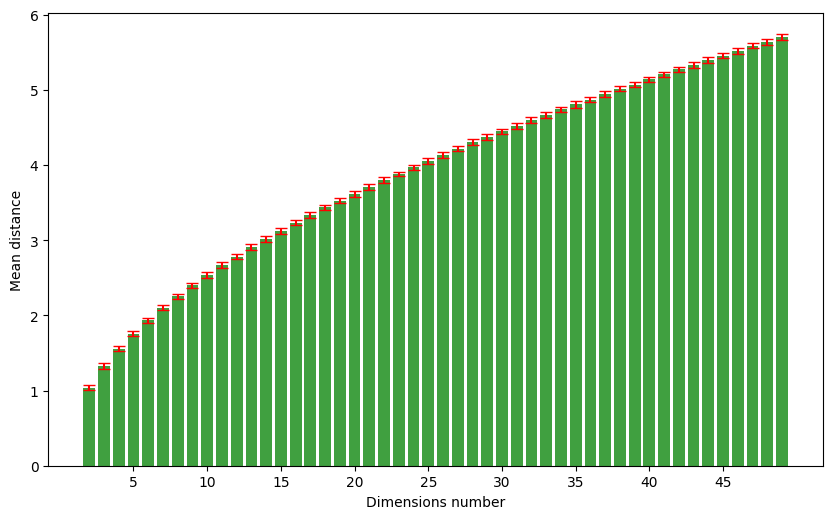

In [82]:
test("Mean distance", 100, np.arange(2, 50), 100, test2, 'mean')

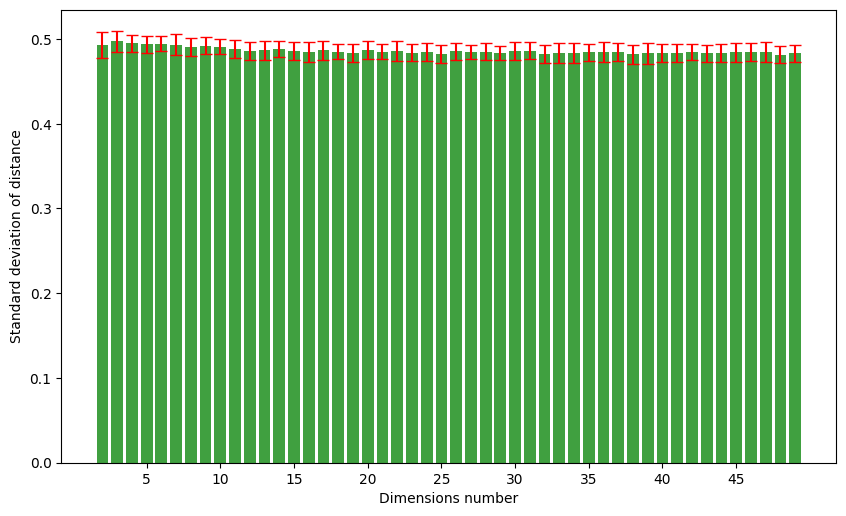

In [83]:
test("Standard deviation of distance", 100, np.arange(2, 50), 100, test2, 'std')

In [ ]:
test('Standard deviation / mean distance', 100, np.arange(2, 50), 100, test2, 'std_to_mean')

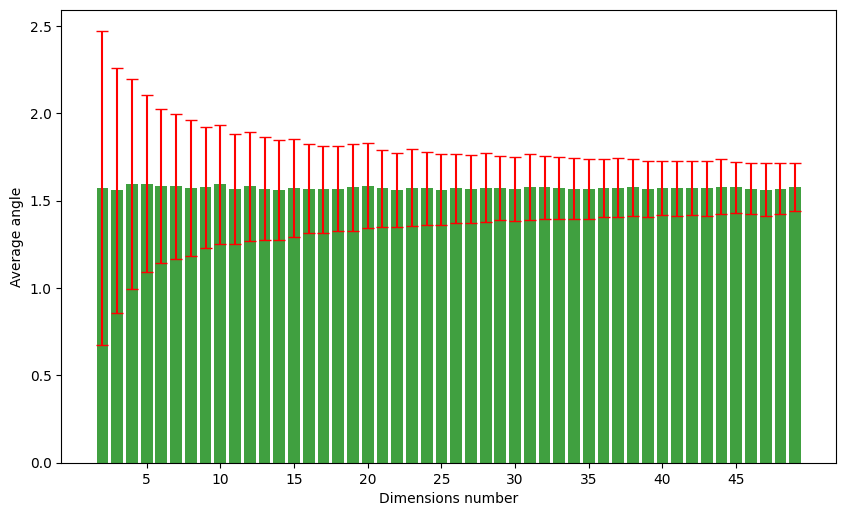

In [51]:
test(1000, np.arange(2, 50), 1000, test3)